## 非极大值抑制(NMS)及其优化实现

NMS的实现方法有：
1. 纯python实现
2. 直接利用Cython模块编译
3. 更改变量定义后再利用Cython模块编译
4. 在方法3的基础上利用gpu

NMS的优化：
1. Soft-NMS
2. 局部感知NMS
3. 倾斜NMS
4. 多边形NMS
5. 掩膜NMS

### NMS实现方式

纯python实现

In [1]:
import numpy as np

def nms_py(dets, thresh):
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]

    areas = (y2-y1+1)*(x2-x1+1)
    scores = dets[:, 4]
    keep = []
    index = scores.argsort()[::-1]
    
    while index.size>0:

        i = index[0]
        keep.append(i)

        x11 = np.maximum(x1[i], x1[index[1:]])
        y11 = np.maximum(y1[i], y1[index[1:]])
        x22 = np.maximum(x2[i], x2[index[1:]])
        y22 = np.maximum(y2[i], y2[index[1:]])
        
        w = np.maximum(0, x22-x11+1)
        h = np.maximum(0, y22-y11+1)

        overlaps = w*h
        ious = overlaps/(areas[i]+areas[index[1:]]-overlaps)
        idx = np.where(ious<=thresh)[0]
        index = index[idx+1]
    return keep

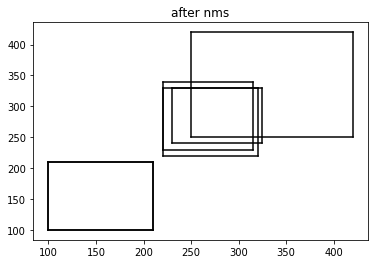

In [7]:
# Test
import matplotlib.pyplot as plt

boxes = np.array(
    [
        [100, 100, 210, 210, 0.72],
        [250, 250, 420, 420, 0.8],
        [220, 220, 320, 330, 0.92],
        [100, 100, 210, 210, 0.72],
        [230, 240, 325, 330, 0.81],
        [220, 230, 315, 340, 0.9]
    ]
)

def plot_bbox(dets, c='k'):
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]
    plt.plot([x1, x2], [y1, y1], c)
    plt.plot([x1, x1], [y1, y2], c)
    plt.plot([x1, x2], [y2, y2], c)
    plt.plot([x2, x2], [y1, y2], c)
    plt.title('after nms')

plot_bbox(boxes, 'k')
keep = nms_py(boxes, thresh=0.7)
plot_bbox(boxes[keep], 'r')

### 参考

1. [Python 非极大值抑制(NMS)的四种实现详解](https://www.wangyeyixia.com/article/1923856.html)